In [92]:
#imported libraries

import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
set_strings = [
    ('a', 'ATGGTGCGAAAGCATCTCTTTTCGTGGCGTGATAAGTTTTATGGTATCCCCGGACGTTGGCTACTACAATTCTCCGAAGTATAAGTGAGTAGGATATGTCAATAACAAGAGGGGATGCGTGACGCATTAGCACCAACTGAATCAAACGATAACTAACGTGGTTTCAGTGAGCGTATGTGGCAAAGGATTGGATACATTTTTCGAGCACGTCTACATAATGACCGTGACAATACTGGAGACTCCGTACCGTCATCTTGACACTCCT'),
    ('b', 'TGGTGCGAAAGCATCTCTTTTCCGTGGCGTATAGTTTTATGGTATCCCCGGAACGCTGGCTACTACAATCTCCGAAGTATAGAGTGAGTAGATTTAATTAACAGAGGGCGTCGTTGACGCATTAGCACCAACTGAATCAACCGATAACTTAACGTGGGTTTCAGTGACTATAGGGCAAAGGATGAACATTTTCGAGCAGCTCTAATAATGAGCGTGACAATATGAATCCACACCGTCATCTTGAACTCCT'), 
    ('c', 'TCTGTGCGATATACATCTCTATCGTTGCGGTATGTTTTATGTGCATCACCCCACGCGCTGGCTACAGTACAATCTGCTGGAAGTACTAGGTGGTAGTTAATAACTAGGGTGCGTCGTTGCGCATTACACAACTGGACAACCACTTAACTGGGGTAATCAGTGTTTAGGGCAGACAAGATGAAAACAAGTTTTCGAGCAGGCTCCTATAATGAGGACGGAACGTTAATAAATCCAACACCGCACTGCTTCGTAACCCT'), 
    ('d', 'ATGAGGCGCAAAATTCTCTTTCTCGTGGCGCTGATTAAGTTTTATGTATCCCCGGACGTTGGCTACTGACAATTGCTCCGAAGTATAAAGTAGTAGGATATGTCAATAACAAAGACGGGGATAGCGTGACAGCATTAGAACGCAACTGGAATCAAACGTAACCTAAAGGGTTGTCAGGAGCGTATGTGGTCAAAAAGGATTGGATGACATTTTTCGACACGTCTACATAATGACCTGTGACAAACTAGGAGACCTCCTACTCGGTCAATCTTGACGACTCCT'),
    ('e', 'TGGTGCGATATACATCTCTTTTCGTGCGTATGTTTTATGGTGATCACCCGGAACCGCTGGCTACATACAATCTCTGGAAGTACTAGGTGGTAGTTTAATAACTAGAGGTGCGTCGTTGACGCATTACACAACTGGATCAACCGAACTTAACTGGGTATCAGTGATATAGGGCGACAAGATGAACAATTTTCGAGCAGCTCCTGAATAATGAGACGGAACGTATAATCCAACACCGTCACTGCTTCGAACCCT'), 
    ('f', 'GGGGGAAAGCGATCCCTTATCGTGGCTGTGATAAGTTTTTATCGGGTATCCGCCGGACGTTGGCGTACTACAATTCTCCGAAGTTAAGTGAGTTAGGGATATAGTCAATAACAAGAGGGGATTGTCGTGACGCATAGCACACAACTGAATCAAATCGATAACTAAACGGGTTTCAGTAGAGCGTTGTGGCAAAGATTGGATACATTTTTCGCAGGACGTCTTACCTAATGACGTGGACAATAACTGGCAGACGTCCGTACCGTCATCTTGACCACTCCCT'), 
    ('g', 'TGGTGCGATATACATCCTCTTTTCGTGCGTATGTTTTAGGTACACCGGATACGCCTGGCTTACAAGTACCAATCTCTGAGAAGTCACTGAGGTGGTAGTTTAATAACTAGAAGGGTGCGTCGGACGCATTCACACATACTGGATCAACCGAGACTTAACTGGGGTATCAGTGATTGATAGGGCGACAAGATATACAATTTTCGAGCAGCTCCCTGAATAAGTGAAGAACGGAGACGTATAATCCAACACGATTCACTGCTTCGAACCCT')
    ]

print(set_strings[1][1])

TGGTGCGAAAGCATCTCTTTTCCGTGGCGTATAGTTTTATGGTATCCCCGGAACGCTGGCTACTACAATCTCCGAAGTATAGAGTGAGTAGATTTAATTAACAGAGGGCGTCGTTGACGCATTAGCACCAACTGAATCAACCGATAACTTAACGTGGGTTTCAGTGACTATAGGGCAAAGGATGAACATTTTCGAGCAGCTCTAATAATGAGCGTGACAATATGAATCCACACCGTCATCTTGAACTCCT


In [108]:
def longest_common_subsequences(x, y):
    """Gives the length of the longest common subsequence (LCS) between strings x and y
    
    Inputs
    ----------
    x, y: strings
        Strings to compute the LCS.
    
    Returns
    ----------
    all_lcs: tuple ([LCS1, LCS2, ...], len(LCS1))
    A tuple containing a list of all longest common subsequences (LCS) and the corresponding length (size)
    """
    
    # initialize the DP table
    m, n = len(x), len(y)

    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # fill the DP table
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if x[i - 1] == y[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    # length of the LCS is in the bottom-right corner of the DP table
    lcs_length = dp[m][n]

    # backtrack iteratively to find all LCS sequences using a stack data structure
    lcs_set = set()
    stack = [(m, n, "")]

    while stack:
        i, j, current_lcs = stack.pop()

        if i == 0 or j == 0:
            # We've reached the top-left corner, add the current LCS to the set
            lcs_set.add(current_lcs)
            continue

        if x[i - 1] == y[j - 1]:
            # If characters match, we add it to the LCS and backtrack diagonally
            stack.append((i - 1, j - 1, x[i - 1] + current_lcs))
        else:
            # If characters don't match, we need to move towards the direction that keeps the LCS length the same
            if dp[i - 1][j] == dp[i][j]:
                stack.append((i - 1, j, current_lcs))  # Move up
            if dp[i][j - 1] == dp[i][j]:
                stack.append((i, j - 1, current_lcs))  # Move left

    # if no LCS exists
    if lcs_length == 0:
        return (None, 0)

    # collect all LCSs
    all_lcs = list(lcs_set)
    return (all_lcs, lcs_length)

In [4]:
#test cases
x1, y1 = 'ABCBDAB', 'BDCABA'
x2, y2 = 'abc', ''
x3, y3 = 'abc', 'a'
x4, y4 = 'abc', 'ac'

#assert longest_common_subsequences(x1, y1) == (['BCBA', 'BDAB', 'BCAB'], 4)
assert longest_common_subsequences(x2, y2) == (None, 0)
assert longest_common_subsequences(x3, y3) == (["a"], 1)
assert longest_common_subsequences(x4, y4) == (["ac"], 2)

In [109]:
#matrix of lengths of LCS
len_matrix = 7

#initializing the 2D numpy array with shape (7,7)
def lcs_length(x, y):
    """
    Computes the length of the Longest Common Subsequence (LCS) between two strings.

    Args:
        x (str): The first string.
        y (str): The second string.

    Returns:
        int: The length of the longest common subsequence between `x` and `y`.
    """

    m, n = len(x), len(y)
    dp = np.zeros((m + 1, n + 1), dtype=int)
    for i in range(m):
        for j in range(n):
            if x[i] == y[j]:
                dp[i + 1, j + 1] = dp[i, j] + 1
            else:
                dp[i + 1, j + 1] = max(dp[i + 1, j], dp[i, j + 1])
    return dp[m, n]


def generate_lcs_matrix(sequences):
    """    
    Generates a matrix of LCS (Longest Common Subsequence) lengths for each pair of sequences
    from the set of sequences.

    Args:
        sequences (list of tuples): A list of tuples, where each tuple consists of a string 
                                       identifier and a string sequence.

    Returns:
        np.ndarray: A 7x7 matrix where each element `len_lcs_matrix[i, j]` represents the 
                    length of the LCS between `sequence[i][1]` and `sequence[j][1]`.
    """

    n = len(sequences)
    matrix = np.zeros((n, n), dtype=int)

    # Make sure we're using the actual sequence strings (sequences[i][1] should be a string)
        # Ensure the sequences are correctly formatted
    for i, seq in enumerate(sequences):
        if not isinstance(seq[1], str):
            print(f"Warning: sequences[{i}] = {seq} has a non-string sequence")

    for i in range(n):
        for j in range(i + 1, n):
            # Ensure that sequences[i][1] and sequences[j][1] are strings
            lcs_len = lcs_length(sequences[i][1], sequences[j][1])
            matrix[i, j] = lcs_len
            matrix[j, i] = lcs_len
    
    return matrix


# LCS length matrix for all pairs of strings in `strings`
len_lcs_matrix = generate_lcs_matrix(set_strings)

# output the LCS length matrix
print(len_lcs_matrix)


#test cases for when the same set_string intersect as this would result in the length
assert len_lcs_matrix[0][0] == 0, 'String a'
assert len_lcs_matrix[1][1] == 0, 'String b'

[[  0 235 199 252 214 251 212]
 [235   0 211 223 227 223 220]
 [199 211   0 197 234 195 229]
 [252 223 197   0 207 241 205]
 [214 227 234 207   0 205 243]
 [251 223 195 241 205   0 208]
 [212 220 229 205 243 208   0]]


In [110]:
# creating the labels for an easier representation
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

# Print the matrix with labels for rows and columns
print("LCS Lengths Matrix:")

#column labels
print("\t" + "\t".join(labels))

#row labels
for i, row in enumerate(len_lcs_matrix):
    print(f"{labels[i]}\t" + "\t".join(map(str, row)))

LCS Lengths Matrix:
	a	b	c	d	e	f	g
a	0	235	199	252	214	251	212
b	235	0	211	223	227	223	220
c	199	211	0	197	234	195	229
d	252	223	197	0	207	241	205
e	214	227	234	207	0	205	243
f	251	223	195	241	205	0	208
g	212	220	229	205	243	208	0


In [111]:
# 2 (a) requested example
len_lcs_matrix[0,3]

252

In [112]:
#finding the sums of the LCS
num_of_strings = len(set_strings)

total_len = []

for i in range(num_of_strings):
    total = 0
    for j in range(num_of_strings):
        total += len_lcs_matrix[i][j]

    #reduce by the current LCS being compared to
    total -= len_lcs_matrix[i][i]

    total_and_index = [set_strings[i][0], total]
    total_len.append(total_and_index)

# sort the list by the second element (total LCS count)
# using lambda notation to specify which element position determines the sorting
sorted_total_len = sorted(total_len, key=lambda x: x[1], reverse='True')

# print the sorted list
print("Strings sorted from highest total LCS count:\n")
for string, total in sorted_total_len:
    print(f"For string {string}, total LCS count is {total}\n")


#print the 3 most similar sequences to each string:
for i in range(num_of_strings):
    most_similar_sequence = []
    

Strings sorted from highest total LCS count:

For string a, total LCS count is 1363

For string b, total LCS count is 1339

For string e, total LCS count is 1330

For string d, total LCS count is 1325

For string f, total LCS count is 1323

For string g, total LCS count is 1317

For string c, total LCS count is 1265



In [114]:
def calculate_total_lcs(sequences):
    """
    Calculate the total LCS length for each sequence by summing the LCS lengths 
    between the current sequence and all other sequences, excluding self-LCS.

    Args:
    sequences (list): A list of tuples, where each tuple contains (sequence_name, sequence).
    
    Returns:
    list: List of tuples (sequence_name, total_lcs_length).
    """
    # generate LCS matrix
    matrix = generate_lcs_matrix(sequences)
    total_lcs_lengths = []
    for i, (seq_name, _) in enumerate(sequences):
        # Sum the LCS values for each sequence, excluding self-LCS (matrix[i, i])
        total_lcs = sum(matrix[i]) - matrix[i][i]  # Exclude self-LCS
        total_lcs_lengths.append((seq_name, total_lcs))
    return total_lcs_lengths


def sort_sequences_by_lcs(sequences):
    """
    Sort the sequences by their total LCS length in descending order.
    
    Args:
    sequences (list): A list of tuples, where each tuple contains (sequence_name, sequence).
    
    Returns:
    list: Sorted list of tuples (sequence_name, total_lcs_length).
    """
    # generate LCS matrix
    matrix = generate_lcs_matrix(sequences)

    total_lcs_lengths = calculate_total_lcs(sequences)
    
    return sorted(total_lcs_lengths, key=lambda x: x[1], reverse=True)


def find_most_similar_sequences(sequence_idx, sequences, top_n=2):
    """
    Find the most similar sequences to the sequence at `sequence_idx` based on the LCS matrix.

    Args:
        sequence_idx (int): Index of the sequence to compare others to.
        sequences (list): List of (sequence_name, sequence) tuples.
        top_n (int): Number of most similar sequences to find.

    Returns:
        list: List of tuples (sequence_name, lcs_length) for the top N most similar sequences.
    """
    matrix = generate_lcs_matrix(sequences)  # Generate LCS matrix
    remaining_sequences = set(range(len(sequences))) - {sequence_idx}  # Exclude current sequence
    
    # Generate the list of LCS values for the remaining sequences
    lcs_values = [(i, matrix[sequence_idx, i]) for i in remaining_sequences]
    
    # Sort the LCS values by length in descending order
    lcs_values.sort(key=lambda x: x[1], reverse=True)
    
    # Map the indices to sequence names and LCS lengths
    similar_sequences = [(sequences[i][0], lcs_value) for i, lcs_value in lcs_values[:top_n]]
    
    return similar_sequences

def test_functions():
    # Test for calculate_total_lcs function
    sequences = [("a", "ACGA"), ("b", "ACTG"), ("c", "ACGT")] # 3 common letters for each
    matrix = generate_lcs_matrix(sequences)
    expected_result_1 = [('a', 6), ('b', 6), ('c', 6)]
    test_1 = calculate_total_lcs(sequences)
    assert test_1 == expected_result_1, f"Test failed for calculate_total_lcs! Expected {expected_result_1}, got {test_1}"

    # Test for sort_sequences_by_lcs function
    expected_result_2 = [('a', 6), ('b', 6), ('c', 6)]  # sorted by LCS values in descending order
    test_2 = sort_sequences_by_lcs(sequences)
    assert test_2 == expected_result_2, f"Test failed for sort_sequences_by_lcs! Expected {expected_result_2}, got {test_2}"

    # Test for find_most_similar_sequences function
    expected_result_3 = [('b', 3), ('c', 3)]  # For "a", the most similar sequences are "b" (LCS = 3) and "c" (LCS = 3)
    test_3 = find_most_similar_sequences(0, sequences, top_n=2)
    assert test_3 == expected_result_3, f"Test failed for find_most_similar_sequences for 'a'! Expected {expected_result_3}, got {test_3}"

    expected_result_4 = [("a", 3), ("c", 3)]  # For "b", the most similar sequences are "a" (LCS = 3) and "c" (LCS = 3)
    test_4 = find_most_similar_sequences(1, sequences, top_n=2)
    assert test_4 == expected_result_4, f"Test failed for find_most_similar_sequences for 'b'! Expected {expected_result_4}, got {test_4}"

    print("All tests passed!")

# Run the tests
test_functions()

All tests passed!


In [115]:
class GenealogyNode:
    """
    A class representing a node in the genealogy tree.
    """
    
    def __init__(self, name, sequence):
        """
        Initializes a GenealogyNode with a given name and sequence.

        Args:
            name (str): The name of the sequence (e.g., 'a', 'b').
            sequence (str): The DNA or string sequence.
        """
        self.name = name
        self.sequence = sequence
        self.children = []  # List of children (maximum of two)
        self.parent = None  # Initially, no parent
        self.lcs_score = 0  # Initially, no LCS score with parent

    def add_child(self, child_node, lcs_score):
        """
        Adds a child node to the current node. Ensures only two children.

        Args:
            child_node (GenealogyNode): The child node to be added.
            lcs_score (int): The LCS score between the current node and the child node.
        """
        if len(self.children) < 2:
            child_node.parent = self
            child_node.lcs_score = lcs_score
            self.children.append(child_node)
        else:
            print(f"Warning: Node {self.name} already has two children.")

    def __repr__(self):
        """Returns a string representation of the node, including its name and LCS score with its parent."""
        return f"GenealogyNode(name={self.name}, LCS={self.lcs_score})"


class GenealogyTree:
    """
    A class representing the genealogy tree built using LCS similarities between sequences.
    """
    
    def __init__(self, sequences):
        """
        Initializes the GenealogyTree.

        Args:
            sequences (list): List of tuples where each tuple contains a sequence name and its corresponding sequence.
            lcs_matrix (np.ndarray): Matrix containing the LCS length between pairs of sequences.
        """
        self.sequences = sequences
        self.lcs_matrix = generate_lcs_matrix(sequences)
        self.nodes = {seq[0]: GenealogyNode(seq[0], seq[1]) for seq in sequences}
        self.root = None  # The root of the tree (to be selected later)

    def get_total_lcs(self, idx):
        """
        Computes the total LCS length for a given sequence index, excluding its self-LCS.

        Args:
            idx (int): The index of the sequence for which we want to calculate the total LCS length.

        Returns:
            int: The total LCS length for the sequence.
        """
        return np.sum(self.lcs_matrix[idx]) - self.lcs_matrix[idx, idx]

    def select_root(self):
        """
        Selects the root of the tree based on the sequence with the highest total LCS length.

        Returns:
            GenealogyNode: The node that serves as the root of the tree.
        """
        total_lcs_lengths = [(i, self.get_total_lcs(i)) for i in range(len(self.sequences))]
        root_idx = max(total_lcs_lengths, key=lambda x: x[1])[0]
        self.root = self.nodes[self.sequences[root_idx][0]]
        return self.root

    def build_tree(self):
        """
        Builds the genealogy tree greedily by selecting the most similar remaining sequence (based on LCS)
        as the child of each node.

        The root node is selected first. Then, for each node, the most similar remaining sequence is selected as its child.
        This process continues until all sequences are added to the tree. Each parent node gets exactly two children.
        """
        remaining_sequences = set(range(len(self.sequences)))  # Set of all sequence indices
        used_indices = set()  # Set of indices that are already used
        # Select the root node
        root = self.select_root()
        used_indices.add(self.sequences.index((root.name, root.sequence)))
        # Start building the tree from the root
        queue = [root]
        while queue:
            current_node = queue.pop(0)
            current_idx = self.sequences.index((current_node.name, current_node.sequence))

            # Find the most similar remaining sequences for the children
            lcs_values = [(i, self.lcs_matrix[current_idx, i]) for i in remaining_sequences if i not in used_indices]

            if not lcs_values:
                break  # No more candidates for children

            # Sort the LCS values in descending order and choose the top 2
            lcs_values.sort(key=lambda x: x[1], reverse=True)
            best_children = lcs_values[:2]  # Select the top two children

            # Add the selected children to the tree
            for best_child_idx, best_lcs_score in best_children:
                best_child_node = self.nodes[self.sequences[best_child_idx][0]]
                current_node.add_child(best_child_node, best_lcs_score)

                # Mark the child as used and add it to the queue for future expansion
                used_indices.add(best_child_idx)
                queue.append(best_child_node)

    def _print_tree(self, root, depth=0):
        """
        Recursively prints the tree from the root, indented by depth.

        Args:
            root (GenealogyNode): The root of the current subtree.
            depth (int): The depth of the current node in the tree.
        """
        if not root:
            return
        
        # Print the current node with indentation based on its depth
        print('\t' * depth + f"➡️ Node {root.name} (LCS: {root.lcs_score})")
        
        # Print all children (there should be exactly two children per parent node)
        for child in root.children:
            self._print_tree(child, depth + 1)
    
    def print_relationships(self, root):
        """
        Prints the parent-child relationships for each node in the tree.
        
        Args:
            root (GenealogyNode): The root of the tree to print relationships.
        """
        if root is None:
            return

        # Print the parent-child relationships
        for child in root.children:
            print(f"{child.name} is the child of parent {root.name} with LCS: {child.lcs_score}")
        
        # Recursively print relationships for all children
        for child in root.children:
            self.print_relationships(child)


In [116]:
tree = GenealogyTree(set_strings)

# Build the tree
tree.build_tree()

# Print the tree structure
print("Tree Structure:")
tree._print_tree(tree.root)

print("\nParent-Child Relationships:")
tree.print_relationships(tree.root)

Tree Structure:
➡️ Node a (LCS: 0)
	➡️ Node d (LCS: 252)
		➡️ Node b (LCS: 223)
		➡️ Node e (LCS: 207)
	➡️ Node f (LCS: 251)
		➡️ Node g (LCS: 208)
		➡️ Node c (LCS: 195)

Parent-Child Relationships:
d is the child of parent a with LCS: 252
f is the child of parent a with LCS: 251
b is the child of parent d with LCS: 223
e is the child of parent d with LCS: 207
g is the child of parent f with LCS: 208
c is the child of parent f with LCS: 195


Elapsed Time for N=5 and M=50: 0.00393 seconds
Elapsed Time for N=10 and M=10: 0.00080 seconds
Elapsed Time for N=10 and M=50: 0.01569 seconds
Elapsed Time for N=15 and M=50: 0.02981 seconds
Elapsed Time for N=20 and M=10: 0.00241 seconds
Elapsed Time for N=20 and M=50: 0.05519 seconds
Elapsed Time for N=25 and M=50: 0.09809 seconds
Elapsed Time for N=30 and M=10: 0.00570 seconds
Elapsed Time for N=30 and M=50: 0.12369 seconds
Elapsed Time for N=35 and M=50: 0.17941 seconds
Elapsed Time for N=40 and M=10: 0.00991 seconds
Elapsed Time for N=40 and M=50: 0.21973 seconds
Elapsed Time for N=45 and M=50: 0.27830 seconds
Elapsed Time for N=50 and M=10: 0.01570 seconds
Elapsed Time for N=50 and M=50: 0.34594 seconds


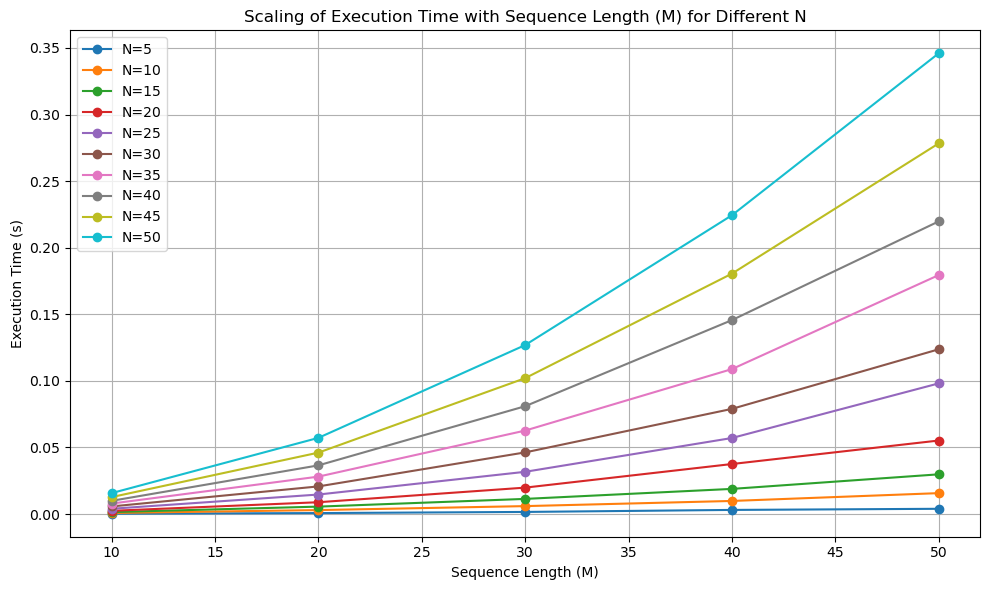

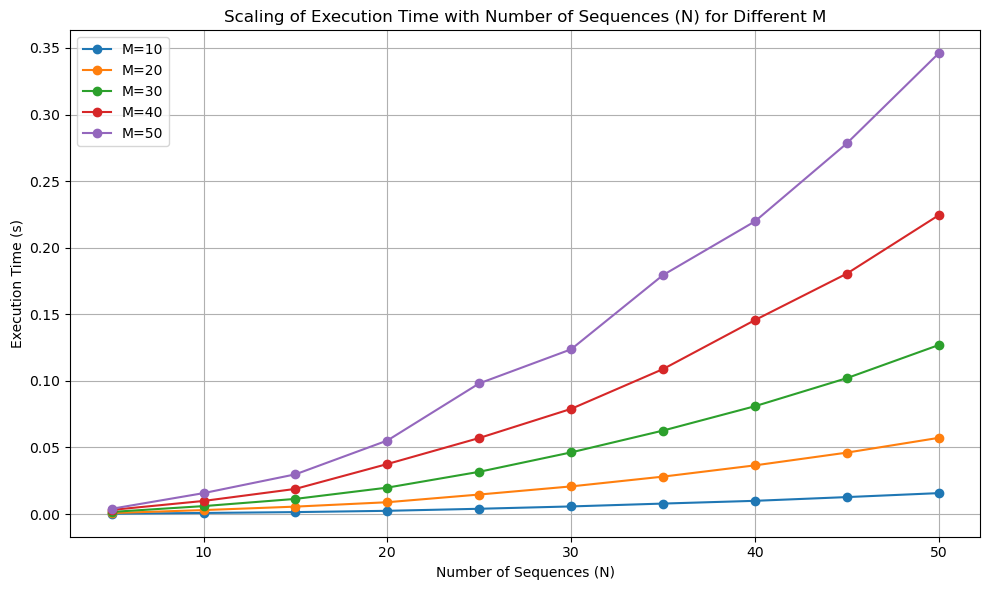

In [87]:
import random
import time
import matplotlib.pyplot as plt

# Function to generate a random DNA sequence of given length
def generate_random_sequence(length):
    return ''.join(random.choice('ACGT') for _ in range(length))

# Function to compute the LCS length between two sequences
def lcs_length(seq1, seq2):
    m, n = len(seq1), len(seq2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if seq1[i - 1] == seq2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    return dp[m][n]

# Function to generate the LCS matrix for a list of sequences
def generate_lcs_matrix(sequences):
    n = len(sequences)
    lcs_matrix = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            lcs_matrix[i][j] = lcs_length(sequences[i], sequences[j])
            lcs_matrix[j][i] = lcs_matrix[i][j]  # Symmetric
    return lcs_matrix

# Function to build the genealogy tree
def build_genealogy_tree(sequences, lcs_matrix):
    n = len(sequences)
    tree = {seq: [] for seq in sequences}
    
    used_indices = set()
    for i in range(n):
        used_indices.add(i)
        for j in range(n):
            if j not in used_indices:
                lcs_score = lcs_matrix[i][j]
                tree[sequences[i]].append((sequences[j], lcs_score))
    
    return tree

# Parameters for N (number of sequences) and M (sequence length)
N_length_start = 5      # Starting number of sequences (N)
N_length_end = 50       # Ending number of sequences (N)
N_length_step = 5       # Step value for N

M_length_start = 10     # Starting sequence length (M)
M_length_end = 50       # Ending sequence length (M)
M_length_step = 10      # Step value for M

# Record time results
time_results = []

# Measure time taken for different combinations of N and M
for N in range(N_length_start, N_length_end + 1, N_length_step):
    for M in range(M_length_start, M_length_end + 1, M_length_step):
        # Generate random sequences of length M
        sequences = [generate_random_sequence(M) for _ in range(N)]
        
        # Measure the time for LCS matrix generation and tree construction
        start_time = time.time()
        
        # Generate the LCS matrix
        lcs_matrix = generate_lcs_matrix(sequences)
        
        # Build the genealogy tree
        build_genealogy_tree(sequences, lcs_matrix)
        
        end_time = time.time()
        elapsed_time = end_time - start_time
        
        # Store the result as (N, M, elapsed_time)
        time_results.append((N, M, elapsed_time))

        # Print elapsed time at specific intervals for experimental testing
        if N % 10 == 0 and M == 10:  # Example: Every time N reaches a multiple of 10 for M=10
            print(f"Elapsed Time for N={N} and M={M}: {elapsed_time:.5f} seconds")

        if M == M_length_end:  # Print for the last value of M at each N
            print(f"Elapsed Time for N={N} and M={M}: {elapsed_time:.5f} seconds")

# Convert the time results into a dictionary for easier plotting
time_dict = {}

# Fill the dictionary with the time taken for each (N, M) combination
for N, M, time_taken in time_results:
    if N not in time_dict:
        time_dict[N] = {}
    time_dict[N][M] = time_taken

# 1. Plot Scaling with respect to Sequence Length (M) for each N
plt.figure(figsize=(10, 6))
for N in time_dict:
    M_values = sorted(time_dict[N].keys())
    time_values = [time_dict[N][M] for M in M_values]
    plt.plot(M_values, time_values, label=f'N={N}', marker='o')

plt.xlabel('Sequence Length (M)')
plt.ylabel('Execution Time (s)')
plt.title('Scaling of Execution Time with Sequence Length (M) for Different N')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Plot Scaling with respect to Number of Sequences (N) for each M
plt.figure(figsize=(10, 6))
for M in range(M_length_start, M_length_end + 1, M_length_step):
    N_values = sorted(time_dict.keys())
    time_values = [time_dict[N].get(M, 0) for N in N_values]
    plt.plot(N_values, time_values, label=f'M={M}', marker='o')

plt.xlabel('Number of Sequences (N)')
plt.ylabel('Execution Time (s)')
plt.title('Scaling of Execution Time with Number of Sequences (N) for Different M')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [70]:
#global tree
def global_genealogy_tree(sequences):
    """
    Brute-force approach to find the genealogy tree that maximizes the total LCS between sequences.
    The tree has 1 root, 2 children, and 4 grandchildren.
    
    Args:
    sequences (list of tuples): List of (sequence_name, sequence) tuples.
    
    Returns:
    tuple: The best genealogy tree (root, children, grandchildren) along with its total LCS value.
    """
    # generate all possible ways to split 7 sequences into (root, 2 children, 4 grandchildren)
    best_lcs = -1
    best_tree = None

    # iterate over all possible ways to choose the root, 2 children, and 4 grandchildren
    for i, root in enumerate(sequences):
        remaining_sequences = [seq for j, seq in enumerate(sequences) if j != i]
        
        # iterate over all ways to pick 2 children from remaining 6 sequences
        for i1 in range(len(remaining_sequences)):
            for i2 in range(i1 + 1, len(remaining_sequences)):
                children_pair = (remaining_sequences[i1], remaining_sequences[i2])
                remaining_grandchildren = [seq for seq in remaining_sequences if seq not in children_pair]
                
                # for each child, choose 2 grandchildren (each child needs exactly 2 grandchildren)
                for j1 in range(len(remaining_grandchildren)):
                    for j2 in range(j1 + 1, len(remaining_grandchildren)):
                        child1_grandchildren = [remaining_grandchildren[j1], remaining_grandchildren[j2]]
                        
                        # Now we need to choose 2 more grandchildren for the second child (e.g., child2)
                        for j3 in range(len(remaining_grandchildren)):
                            if remaining_grandchildren[j3] not in child1_grandchildren:
                                for j4 in range(j3 + 1, len(remaining_grandchildren)):
                                    if remaining_grandchildren[j4] not in child1_grandchildren:
                                        child2_grandchildren = [remaining_grandchildren[j3], remaining_grandchildren[j4]]
                                        
                                        # Now we have 2 grandchildren for both child1 and child2
                                        current_tree = (root, children_pair, child1_grandchildren, child2_grandchildren)
                                        
                                        # compute the total LCS for this tree configuration
                                        total_lcs = compute_tree_lcs(current_tree)
                                        
                                        # check if this tree configuration has the best LCS so far
                                        if total_lcs > best_lcs:
                                            best_lcs = total_lcs
                                            best_tree = current_tree

    return best_tree, best_lcs


def compute_tree_lcs(tree):
    """
    Computes the total LCS for a given tree configuration.
    
    Args:
    tree (tuple): A tuple (root, children_pair, child1_grandchildren, child2_grandchildren).
    
    Returns:
    int: The total LCS value for this tree configuration.
    """
    root, (child1, child2), child1_grandchildren, child2_grandchildren = tree
    
    # LCS values between root and children
    lcs_root_child1 = lcs_length(root[1], child1[1])
    lcs_root_child2 = lcs_length(root[1], child2[1])
    
    # LCS values between children and grandchildren
    lcs_child1_grandchildren = sum(lcs_length(child1[1], grandchild[1]) for grandchild in child1_grandchildren)
    lcs_child2_grandchildren = sum(lcs_length(child2[1], grandchild[1]) for grandchild in child2_grandchildren)
    
    # Total LCS for this tree configuration
    total_lcs = lcs_root_child1 + lcs_root_child2 + lcs_child1_grandchildren + lcs_child2_grandchildren
    
    return total_lcs


# Test example (with your sequences)
best_tree, best_lcs = global_genealogy_tree(set_strings)

def format_best_tree_output(best_tree, best_lcs):
    """
    Format the output to display the best tree structure (just the sequence names) and the best LCS value.
    
    Args:
    best_tree (tuple): The best genealogy tree (root, children, grandchildren).
    best_lcs (int): The best LCS value for the tree configuration.
    
    Returns:
    str: Formatted string with the best tree and its LCS value.
    """
    # Extract sequence names from the tree structure
    root, children_pair, child1_grandchildren, child2_grandchildren = best_tree
    root_name = root[0]
    child1_name, child2_name = children_pair[0][0], children_pair[1][0]
    grandchild1_names = [grandchild[0] for grandchild in child1_grandchildren]
    grandchild2_names = [grandchild[0] for grandchild in child2_grandchildren]
    
    # Format the output
    formatted_output = f"Best Tree:\n"
    formatted_output += f"Root: {root_name}\n"
    formatted_output += f"Children: {child1_name}, {child2_name}\n"
    formatted_output += f"Grandchildren of {child1_name}: {', '.join(grandchild1_names)}\n"
    formatted_output += f"Grandchildren of {child2_name}: {', '.join(grandchild2_names)}\n"
    formatted_output += f"Best LCS: {best_lcs}"
    
    return formatted_output

# Example usage
formatted_output = format_best_tree_output(best_tree, best_lcs)
print(formatted_output)

Best Tree:
Root: b
Children: a, e
Grandchildren of a: d, f
Grandchildren of e: c, g
Best LCS: 1442


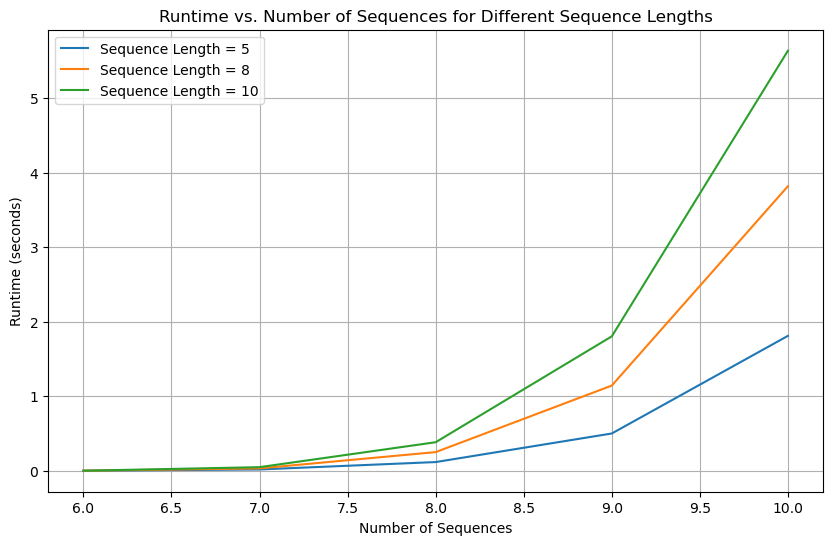

For 6 sequences, with each of Length = 5: The average time taken is= 0.0001 seconds
For 7 sequences, with each of Length = 5: The average time taken is= 0.0171 seconds
For 8 sequences, with each of Length = 5: The average time taken is= 0.1163 seconds
For 9 sequences, with each of Length = 5: The average time taken is= 0.4998 seconds
For 10 sequences, with each of Length = 5: The average time taken is= 1.8103 seconds
For 6 sequences, with each of Length = 8: The average time taken is= 0.0001 seconds
For 7 sequences, with each of Length = 8: The average time taken is= 0.0313 seconds
For 8 sequences, with each of Length = 8: The average time taken is= 0.2499 seconds
For 9 sequences, with each of Length = 8: The average time taken is= 1.1428 seconds
For 10 sequences, with each of Length = 8: The average time taken is= 3.8185 seconds
For 6 sequences, with each of Length = 10: The average time taken is= 0.0001 seconds
For 7 sequences, with each of Length = 10: The average time taken is= 0.0

In [90]:
#experimental plot for the global solution

def generate_random_dna(length):
    """
    Generates a random DNA sequence of the given length.
    
    Args:
    length (int): The length of the DNA sequence to generate.
    
    Returns:
    str: A random DNA sequence containing 'A', 'T', 'G', and 'C'.
    """
    return ''.join(random.choices('ATGC', k=length))

def compute_tree_lcs(tree):
    """
    Computes the total Longest Common Subsequence (LCS) for a genealogy tree configuration.
    This tree consists of a root, two children, and four grandchildren.
    
    Args:
    tree (tuple): A tuple representing the tree configuration. It consists of:
                  - root: (name, sequence) of the root sequence,
                  - children_pair: a tuple of two children (name, sequence),
                  - child1_grandchildren: a list of two grandchildren (name, sequence),
                  - child2_grandchildren: a list of two grandchildren (name, sequence).
    
    Returns:
    int: The total LCS value for this tree configuration.
    """
    root, (child1, child2), child1_grandchildren, child2_grandchildren = tree
    lcs_root_child1 = lcs_length(root[1], child1[1])
    lcs_root_child2 = lcs_length(root[1], child2[1])
    
    lcs_child1_grandchildren = sum(lcs_length(child1[1], grandchild[1]) for grandchild in child1_grandchildren)
    lcs_child2_grandchildren = sum(lcs_length(child2[1], grandchild[1]) for grandchild in child2_grandchildren)
    
    total_lcs = lcs_root_child1 + lcs_root_child2 + lcs_child1_grandchildren + lcs_child2_grandchildren
    return total_lcs

def generate_sequences(num_sequences, seq_length):
    """
    Generates a list of random DNA sequences with the specified number of sequences and length.
    
    Args:
    num_sequences (int): The number of sequences to generate.
    seq_length (int): The length of each DNA sequence.
    
    Returns:
    list of tuples: A list of tuples, where each tuple contains:
                    - sequence_name: A string representing the name of the sequence.
                    - sequence: A string representing the DNA sequence.
    """
    sequences = []
    for i in range(num_sequences):
        seq_name = f"seq{i+1}"
        seq = generate_random_dna(seq_length)
        sequences.append((seq_name, seq))
    return sequences

def measure_runtime(num_sequences_list, seq_length_list):
    """
    Measures the runtime of the `global_genealogy_tree` function for different numbers of sequences
    and sequence lengths.
    
    Args:
    num_sequences_list (list of int): List of numbers of sequences to test.
    seq_length_list (list of int): List of sequence lengths to test.
    
    Returns:
    dict: A dictionary where the keys are sequence lengths and the values are lists of runtimes.
          Each list contains the measured runtimes for the corresponding number of sequences.
    """
    runtimes = {}

    for seq_length in seq_length_list:
        runtimes[seq_length] = []
        for num_sequences in num_sequences_list:
            if num_sequences == 0:
                continue  # Skip the case with 0 sequences as it would not be valid
            
            sequences = generate_sequences(num_sequences, seq_length)

            # Measure runtime for computing the best genealogy tree
            start_time = time.time()
            global_genealogy_tree(sequences)
            end_time = time.time()

            # Record the runtime (in seconds)
            runtimes[seq_length].append(end_time - start_time)

    return runtimes

def plot_runtime(runtimes, num_sequences_list):
    """
    Plots the runtime of the `global_genealogy_tree` function as a line plot for different sequence lengths
    and varying numbers of sequences.
    
    Args:
    runtimes (dict): A dictionary where keys are sequence lengths and values are lists of runtimes.
    num_sequences_list (list of int): A list of the numbers of sequences that were tested.
    
    Returns:
    None: Displays the plot.
    """
    plt.figure(figsize=(10, 6))

    # Plot runtime for different sequence lengths
    for seq_length, times in runtimes.items():
        plt.plot(num_sequences_list, times, label=f'Sequence Length = {seq_length}')

    plt.xlabel('Number of Sequences')
    plt.ylabel('Runtime (seconds)')
    plt.title('Runtime vs. Number of Sequences for Different Sequence Lengths')
    plt.legend()
    plt.grid(True)
    plt.show()

def print_specific_points(runtimes, specific_points, num_sequences_list):
    """
    Prints the runtime for specific points in the runtime data (e.g., 5, 7, and 9 sequences).
    
    Args:
    runtimes (dict): A dictionary where keys are sequence lengths and values are lists of runtimes.
    specific_points (list of int): A list of indices to specify the points to print.
    num_sequences_list (list of int): A list of the numbers of sequences that were tested.
    
    Returns:
    None: Prints the specific points.
    """
    for seq_length, times in runtimes.items():
        for point in specific_points:
            if point < len(times):
                print(f"For {num_sequences_list[point]} sequences, with each of Length = {seq_length}: The average time taken is= {times[point]:.4f} seconds")


# for 5 sequences
num_sequences_list = [6, 7, 8, 9, 10] 

# Sequence lengths to test
seq_length_list = [5, 8, 10]  

# Measure runtime for different configurations
runtimes = measure_runtime(num_sequences_list, seq_length_list)

# Plot the runtime data
plot_runtime(runtimes, num_sequences_list)

specific_points = [0, 1, 2, 3, 4] 

# Print average time for specific points
print_specific_points(runtimes, specific_points, num_sequences_list)


In [ ]:
def compute_edit_operations_between_sequences(seq1, seq2):
    """
    Computes the number of mutations, insertions, and deletions required to transform seq1 to seq2.
    
    Args:
    seq1 (str): The first DNA sequence.
    seq2 (str): The second DNA sequence.
    
    Returns:
    tuple: A tuple containing the number of insertions, deletions, and mutations.
    """
    m, n = len(seq1), len(seq2)
    dp = np.zeros((m + 1, n + 1), dtype=int)

    # fill the DP table
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i, j] = j  # an insertion
            elif j == 0:
                dp[i, j] = i  # a deletion
            elif seq1[i - 1] == seq2[j - 1]:
                dp[i, j] = dp[i - 1, j - 1]  # same element
            else:
                dp[i, j] = min(dp[i - 1, j - 1], dp[i, j - 1], dp[i - 1, j]) + 1


    #  counting operations
    insertions = deletions = mutations = 0
    i, j = m, n

    while i > 0 and j > 0:
        if seq1[i - 1] == seq2[j - 1]:
            i -= 1
            j -= 1
        elif dp[i, j] == dp[i - 1, j - 1] + 1:
            mutations += 1
            i -= 1
            j -= 1
        elif dp[i, j] == dp[i, j - 1] + 1:
            insertions += 1
            j -= 1
        elif dp[i, j] == dp[i - 1, j] + 1:
            deletions += 1
            i -= 1

    # if there are remaining characters in either sequence, count them as insertions or deletions
    if j > 0:  # remaining characters in seq2 are insertions
        insertions += j
    if i > 0:  # remaining characters in seq1 are deletions
        deletions += i

    return insertions, deletions, mutations

# test for insertions
seq1 = "A"
seq2 = "ACT"
insertions, deletions, mutations = compute_edit_operations_between_sequences(seq1, seq2)

assert insertions == 2, 'We added 2 characters'
assert deletions == 0, 'No characters were added'
assert mutations == 0, 'No mutations were done'

# test for deletions
seq1 = "ACTA"
seq2 = "ACT"
insertions, deletions, mutations = compute_edit_operations_between_sequences(seq1, seq2)

assert insertions == 0, 'No characters were added'
assert deletions == 1, '1 character was removed'
assert mutations == 0, 'No mutations were done'

# test for mutations
seq1 = "ACG"
seq2 = "ACT"
insertions, deletions, mutations = compute_edit_operations_between_sequences(seq1, seq2)

assert insertions == 0, 'No characters were added'
assert deletions == 0, 'No character was removed'
assert mutations == 1, '1 mutation was done'

def estimate_tree_probabilities(best_tree):
    """
    Estimates the probabilities of insertions, deletions, and mutations based on the global genealogy tree.
    
    Args:
    best_tree (tuple): The best genealogy tree (root, children, grandchildren).
    
    Returns:
    tuple: The probabilities of mutation, insertion, and deletion.
    """
    root, (child1, child2), child1_grandchildren, child2_grandchildren = best_tree
    
    total_insertions = 0
    total_deletions = 0
    total_mutations = 0
    total_comparisons = 0

    # compare root with both children
    for child in [child1, child2]:
        insertions, deletions, mutations = compute_edit_operations_between_sequences(root[1], child[1])
        total_insertions += insertions
        total_deletions += deletions
        total_mutations += mutations
        total_comparisons += 1

    # compare children with their grandchildren
    for child, grandchildren in [(child1, child1_grandchildren), (child2, child2_grandchildren)]:
        for grandchild in grandchildren:
            insertions, deletions, mutations = compute_edit_operations_between_sequences(child[1], grandchild[1])
            total_insertions += insertions
            total_deletions += deletions
            total_mutations += mutations
            total_comparisons += 1

    # calculate probabilities
    total_operations = total_insertions + total_deletions + total_mutations
    if total_operations == 0:
        return 0, 0, 0  # avoid a possible division by zero

    P_mutation = total_mutations / total_operations
    P_insertion = total_insertions / total_operations
    P_deletion = total_deletions / total_operations

    return P_mutation, P_insertion, P_deletion, total_operations

In [68]:
# best_tree from the result of global_genealogy_tree()
global_tree, _ = global_genealogy_tree(set_strings)
P_mutation, P_insertion, P_deletion, _ = estimate_tree_probabilities(global_tree)

print(f"Mutation Probability: {P_mutation:.4f}")
print(f"Insertion Probability: {P_insertion:.4f}")
print(f"Deletion Probability: {P_deletion:.4f}")

Mutation Probability: 0.2043
Insertion Probability: 0.5489
Deletion Probability: 0.2468
